## Holiday Package Prediciton
1) Problem statement.
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

2) Data Collection.
The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction The data consists of 20 column and 4888 rows.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
df1= pd.read_csv(r"C:\Users\symni\Desktop\Data Science motes and resources- Krish naik\Random Foret\Travel.csv")

In [6]:
df= df1.copy()
df2=df1.copy()

In [7]:
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


## Data Cleaning
### Handling Missing values
1. Handling Missing values
2. Handling Duplicates
3. Check data type
4. Understand the dataset

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [9]:
df1.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [10]:
df1['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [11]:
df1['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [12]:
df1['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [13]:
df1['Gender']=df['Gender'].replace('Fe Male', 'Female')
df1['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')

In [14]:
df1['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [15]:
df1['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [16]:
#replaced the wrong values

In [17]:
## Now Find the null values
df1.select_dtypes(exclude='object').describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


### Imputing Null values
1. Impute Median value for Age column
2. Impute Mode for Type of Contract
3. Impute Median for Duration of Pitch
4. Impute Mode for NumberofFollowup as it is Discrete feature
5. Impute Mode for PreferredPropertyStar
6. Impute Median for NumberofTrips
7. Impute Mode for NumberOfChildrenVisiting
8. Impute Median for MonthlyIncome

USE MODE FOR NUMERICAL COLUMNS AND MEDIAN FOR CATEGORICAL COLUMNS 

In [18]:
df1['Age'].fillna(df1['Age'].median(), inplace= True)
df1['DurationOfPitch'].fillna(df1['DurationOfPitch'].median(), inplace= True)
df1['NumberOfTrips'].fillna(df1['NumberOfTrips'].median(), inplace= True)
df1['MonthlyIncome'].fillna(df1['MonthlyIncome'].median(), inplace= True)


df1['TypeofContact'].fillna(df1['TypeofContact'].mode()[0], inplace= True)
df1['NumberOfFollowups'].fillna(df1['NumberOfFollowups'].mode()[0], inplace= True)
df1['PreferredPropertyStar'].fillna(df1['PreferredPropertyStar'].mode()[0], inplace= True)
df1['NumberOfChildrenVisiting'].fillna(df1['NumberOfChildrenVisiting'].mode()[0], inplace= True)

##why mode()[0]?
'''Think of .mode() as:
“Tell me what value is most common”
That’s it.
need to give [0] for it to fill the emoty ones'''

'Think of .mode() as:\n“Tell me what value is most common”\nThat’s it.\nneed to give [0] for it to fill the emoty ones'

In [19]:
df1['Age'].isnull().sum()
df1['DurationOfPitch'].isnull().sum()


0

In [20]:
df1.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [21]:
## now we have replaced all the null values

In [22]:
df1.drop('CustomerID', inplace=True, axis=1)


In [23]:
df1

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Unmarried,3.0,1,3,1,2.0,Executive,21212.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Unmarried,3.0,0,5,0,2.0,Executive,20289.0


### Feature Engineering

In [24]:
# create new column for feature
df1['TotalVisiting'] = df1['NumberOfPersonVisiting'] + df1['NumberOfChildrenVisiting']
df1.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

In [25]:
#find all numerical features and categorical features because they need to be preprocessed differently.
# we will group all the columns that are numerical and then columns that are categorical 

In [26]:
num_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Numerical Fetaures are:', num_feature)
print('Number of Numerical Fetaures are:', len(num_feature))

Numerical Fetaures are: ['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']
Number of Numerical Fetaures are: 14


In [27]:
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Categorical Fetaures are:', cat_feature)
print('Number of Categorica Fetaures are:', len(cat_feature))

Categorical Fetaures are: ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']
Number of Categorica Fetaures are: 6


### Train test Split
  Train–Test Split
        ↓
  Fit preprocessing on TRAIN data
        ↓
  Apply same preprocessing to TEST data
        ↓
  Train model


In [28]:
'''Short answer: you should split first, then preprocess ✅
Long answer below (this is a VERY important concept for interviews and real projects).

✅ Correct Order (BEST PRACTICE)
Train–Test Split
        ↓
Fit preprocessing on TRAIN data
        ↓
Apply same preprocessing to TEST data
        ↓
Train model

❌ Wrong Order (COMMON MISTAKE)
Preprocess entire dataset
        ↓
Train–Test Split


This causes data leakage ❌

🧠 Why split FIRST? (Core Reason)

Because preprocessing learns information from data.

Examples:

StandardScaler learns mean & std

OneHotEncoder learns categories

Imputer learns median / mode

If you preprocess before splitting, your model indirectly sees test data information.

👉 This inflates performance and fails in real life.

🔴 Data Leakage Explained (Simple)

Imagine:

Test customers influence the average income

That average is used to scale training data

Your model has now “peeked” at test data.

That’s cheating 🚫'''

'Short answer: you should split first, then preprocess ✅\nLong answer below (this is a VERY important concept for interviews and real projects).\n\n✅ Correct Order (BEST PRACTICE)\nTrain–Test Split\n        ↓\nFit preprocessing on TRAIN data\n        ↓\nApply same preprocessing to TEST data\n        ↓\nTrain model\n\n❌ Wrong Order (COMMON MISTAKE)\nPreprocess entire dataset\n        ↓\nTrain–Test Split\n\n\nThis causes data leakage ❌\n\n🧠 Why split FIRST? (Core Reason)\n\nBecause preprocessing learns information from data.\n\nExamples:\n\nStandardScaler learns mean & std\n\nOneHotEncoder learns categories\n\nImputer learns median / mode\n\nIf you preprocess before splitting, your model indirectly sees test data information.\n\n👉 This inflates performance and fails in real life.\n\n🔴 Data Leakage Explained (Simple)\n\nImagine:\n\nTest customers influence the average income\n\nThat average is used to scale training data\n\nYour model has now “peeked” at test data.\n\nThat’s cheating 🚫'

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X1= df1.drop(['ProdTaken'], axis =1)
y1 = df1['ProdTaken']


'''x is input features data so itll have all the data excep the output feature thast product taken or not
y will have the output features'''

'x is input features data so itll have all the data excep the output feature thast product taken or not\ny will have the output features'

In [31]:
X1

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.0,Self Enquiry,3,9.0,Small Business,Male,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,Manager,26576.0,4.0
4884,28.0,Company Invited,1,31.0,Salaried,Male,5.0,Basic,3.0,Unmarried,3.0,1,3,1,Executive,21212.0,6.0
4885,52.0,Self Enquiry,3,17.0,Salaried,Female,4.0,Standard,4.0,Married,7.0,0,1,1,Senior Manager,31820.0,7.0
4886,19.0,Self Enquiry,3,16.0,Small Business,Male,4.0,Basic,3.0,Unmarried,3.0,0,5,0,Executive,20289.0,5.0


In [32]:
X1.isnull().sum()

Age                       0
TypeofContact             0
CityTier                  0
DurationOfPitch           0
Occupation                0
Gender                    0
NumberOfFollowups         0
ProductPitched            0
PreferredPropertyStar     0
MaritalStatus             0
NumberOfTrips             0
Passport                  0
PitchSatisfactionScore    0
OwnCar                    0
Designation               0
MonthlyIncome             0
TotalVisiting             0
dtype: int64

In [33]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.2, random_state = 42)
X1_train.shape, X1_test.shape

((3910, 17), (978, 17))

In [34]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

### preprocessing

'''🔎 What is ColumnTransformer?
Definition: A scikit-learn class (sklearn.compose.ColumnTransformer) that applies specified transformers (like scalers, encoders, imputers) to selected columns of a dataset, then concatenates the results into a single feature set.

Purpose: Handles heterogeneous data (numerical + categorical) efficiently, so you don’t need to preprocess each column separately.

OneHotEncoder → categorical → binary columns.

StandardScaler → numerical → standardized values. (makes it the same scale- metres, kgs, units)

Together in a ColumnTransformer + Pipeline, they give you a clean, reproducible workflow.
🔹 Why ColumnTransformer is a BIG DEAL (Interview Gold)
❌ Without ColumnTransformer

Manual encoding

Risk of data leakage

Different preprocessing for train/test

Errors in production

✅ With ColumnTransformer

Single source of truth

No leakage

Same logic for:

Training

Testing

New customer prediction
to Explain This in an Interview (SCRIPT)

“Since my dataset had both numerical and categorical features, I used a ColumnTransformer to apply OneHotEncoding to categorical columns and StandardScaling to numerical columns. This ensured consistent preprocessing across training, testing, and inference, and prevented data leakage.'''

In [35]:

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


In [36]:
#the x train and y train test has to be in dataframe type because after transfirmation it tunrs into numpy, so ensure that always, then we cannot

In [37]:
type(X1_train)

pandas.core.frame.DataFrame

In [38]:
type(X1_test)

pandas.core.frame.DataFrame

In [39]:
'''num_features = ['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips']
cat_features = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched','MaritalStatus', 'Designation']
or'''
cat_features = X1.select_dtypes(include="object").columns
num_features = X1.select_dtypes(exclude="object").columns

numeric_transformer = StandardScaler()
oh_transformer =  OneHotEncoder(drop='first')  #“For each categorical feature, drop one category and encode the rest.Think of a switch:ON → Male,OFF → Female.You don’t need two switches to represent ON/OFF.



preprocessor = ColumnTransformer(
   transformers=[
         ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features),
        ('num', StandardScaler(), num_features)
    ]
)



In [40]:
preprocessor

ColumnTransformer(transformers=[('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('num', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [41]:
num_features
cat_features

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [42]:
# now applying these transformations in training models AND TEST

In [43]:
X1_train = preprocessor.fit_transform(X1_train)

In [44]:
X1_test = preprocessor.transform(X1_test) # only transform for test, not fit transform

In [45]:
type(X1_train)

numpy.ndarray

In [46]:
type(X1_test)

numpy.ndarray

In [47]:
'''can also create a pipeline 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=300,
        random_state=42
    ))
])
Raw DataFrame
   ↓
Preprocessing (fit only on train)
   ↓
Model training
✔ No leakage
✔ No double preprocessing
✔ No column-name errors

4️⃣ Train the Pipeline (ONE LINE)
python
Copy code
pipe.fit(X_train, y_train)
That’s it.
Internally, sklearn does:

preprocessor.fit_transform(X_train)

model.fit(transformed_X_train, y_train)'''

"can also create a pipeline \nfrom sklearn.pipeline import Pipeline\nfrom sklearn.ensemble import RandomForestClassifier\n\npipe = Pipeline(steps=[\n    ('preprocessing', preprocessor),\n    ('model', RandomForestClassifier(\n        n_estimators=300,\n        random_state=42\n    ))\n])\nRaw DataFrame\n   ↓\nPreprocessing (fit only on train)\n   ↓\nModel training\n✔ No leakage\n✔ No double preprocessing\n✔ No column-name errors\n\n4️⃣ Train the Pipeline (ONE LINE)\npython\nCopy code\npipe.fit(X_train, y_train)\nThat’s it.\nInternally, sklearn does:\n\npreprocessor.fit_transform(X_train)\n\nmodel.fit(transformed_X_train, y_train)"

### Random Forest classification training

In [48]:
X1_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.38224537, -0.77415132],
       [ 1.        ,  0.        ,  1.        , ...,  0.78296635,
        -0.4597992 ,  0.64361526],
       [ 1.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.24519557, -0.06526803],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.36057591,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.25279888,  0.64361526],
       [ 0.        ,  0.        ,  1.        , ..., -1.2771941 ,
        -1.08251091, -1.48303461]])

In [49]:
#convert the x1_train from numpy to pandas dataframe because we need the metadata as well(column names and so on )

In [50]:
pd.DataFrame(X1_train)


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.653841,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.455047,-0.898180,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,1.545210,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,1.789549,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,0.643615


In [51]:
y1_train

3995    0
2610    0
3083    0
3973    0
4044    0
       ..
4426    0
466     0
3092    0
3772    0
860     1
Name: ProdTaken, Length: 3910, dtype: int64

In [55]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score,roc_curve

In [58]:
'''🔹 accuracy_score

What % predictions are correct overall

(TP + TN) / Total

⚠️ Misleading when classes are imbalanced

🔹 precision_score

Of what I predicted as POSITIVE, how many were correct

TP / (TP + FP)

Use when false positives are costly (spam, fraud alerts)

🔹 recall_score (Sensitivity)

Of all actual POSITIVES, how many did I catch

TP / (TP + FN)

Use when missing positives is costly (disease, fraud)

🔹 f1_score

Balance between precision & recall

2 × (precision × recall) / (precision + recall)

Use when both FP & FN matter

🔹 classification_report

All key metrics in one table

Precision

Recall

F1-score

Support (count per class)

Quick model health snapshot 📊

🔹 ConfusionMatrixDisplay

Visual TP, TN, FP, FN

Shows where the model is making mistakes

Best for error analysis

🔹 roc_curve

Model’s ability across all thresholds

X-axis: False Positive Rate

Y-axis: True Positive Rate

Shows trade-off between sensitivity & false alarms

🔹 roc_auc_score

Single number summary of ROC

Range: 0.5 (random) → 1.0 (perfect)

Higher = better class separation

🔥 One-line memory trick

Accuracy → Overall correctness

Precision → “How wrong are my YES predictions?”

Recall → “Did I miss any YES?”

F1 → Balance

Confusion matrix → Error map

ROC → Threshold behavior

AUC → Ranking power'''

'🔹 accuracy_score\n\nWhat % predictions are correct overall\n\n(TP + TN) / Total\n\n⚠️ Misleading when classes are imbalanced\n\n🔹 precision_score\n\nOf what I predicted as POSITIVE, how many were correct\n\nTP / (TP + FP)\n\nUse when false positives are costly (spam, fraud alerts)\n\n🔹 recall_score (Sensitivity)\n\nOf all actual POSITIVES, how many did I catch\n\nTP / (TP + FN)\n\nUse when missing positives is costly (disease, fraud)\n\n🔹 f1_score\n\nBalance between precision & recall\n\n2 × (precision × recall) / (precision + recall)\n\nUse when both FP & FN matter\n\n🔹 classification_report\n\nAll key metrics in one table\n\nPrecision\n\nRecall\n\nF1-score\n\nSupport (count per class)\n\nQuick model health snapshot 📊\n\n🔹 ConfusionMatrixDisplay\n\nVisual TP, TN, FP, FN\n\nShows where the model is making mistakes\n\nBest for error analysis\n\n🔹 roc_curve\n\nModel’s ability across all thresholds\n\nX-axis: False Positive Rate\n\nY-axis: True Positive Rate\n\nShows trade-off between se

In [63]:
#when we have multiple models we need to create a dictionary

models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "XGBoost" :XGBClassifier()
}

In [65]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    
    #train  models
    model.fit(X1_train, y1_train)
    
    #make predictions
    y1_train_pred = model.predict(X1_train)
    y1_test_pred = model.predict(X1_test)
    
    
     # Training set performance to check the correctness btw the y and y^
    model_train_accuracy = accuracy_score(y1_train, y1_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y1_train, y1_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y1_train, y1_train_pred) # Calculate Precision
    model_train_recall = recall_score(y1_train, y1_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y1_train, y1_train_pred)
    
    # Test set performance
    model_test_accuracy = accuracy_score(y1_test, y1_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y1_test, y1_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y1_test, y1_test_pred) # Calculate Precision
    model_test_recall = recall_score(y1_test, y1_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y1_test, y1_test_pred) #Calculate Roc
    
    print(list(models.keys())[i])
    
    
       
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.8458
- F1 score: 0.8200
- Precision: 0.6994
- Recall: 0.3032
- Roc Auc Score: 0.6366
----------------------------------
Model performance for Test set
- Accuracy: 0.8354
- F1 score: 0.8078
- Precision: 0.6829
- Recall: 0.2932
- Roc Auc Score: 0.6301


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9162
- F1 score: 0.9162
- Precision: 0.7853
- Recall: 0.7853
- Roc Auc Score: 0.8666


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9284
- F1 score: 0.9228
- Precision: 0.9690
- Recall: 0.6545
- Roc Auc Score: 0.8247


Gradient Boost
Model performance for Training se

### Hyper Parameter Tuning

### Hyperparameters are values set before training that control how the model learns 
(e.g., learning rate, number of trees in Random Forest, regularization strength in Logistic Regression).

We used default parameter when defining the models becasue we didnt explicitly define any paprameter inside the models.
so it.

Defaults are provided:  
For example, in LogisticRegression(), scikit-learn sets C=1.0 (regularization strength), penalty='l2', and solver='lbfgs' by default.

Reasonable starting points:  
These defaults are chosen to work decently across many datasets, so you’ll usually get a working model.

But not optimal:  
The defaults may not be the best for your dataset. That’s where hyperparameter tuning comes in — to squeeze out better performance.

'''

### 🎯 Why Tuning Matters Even If Defaults Work
1. Performance boost: You might improve accuracy, precision, recall, or F1-score significantly.
2. Generalization: Proper tuning helps the model perform better on unseen data.
3. Bias-variance balance: Hyperparameters control complexity (e.g., tree depth, regularization strength). Tuning finds the sweet spot between underfitting and overfitting.'''

In [86]:
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10, 100],        # Regularization strength (smaller = stronger regularization)
    'penalty': ['l1', 'l2'],             # Type of regularization
    'solver': ['liblinear', 'saga', 'lbfgs']  # Optimization algorithm
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],     # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],  # Shrinks contribution of each tree
    'max_depth': [3, 5, 7],              # Depth of individual trees
    'subsample': [0.8, 1.0],             # Fraction of samples used per tree
    'min_samples_split': [2, 5, 10],     # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]        # Minimum samples per leaf
}

param_grid_rf = {
    'n_estimators': [100, 200, 500,1000],     # Number of trees
    'max_depth': [None, 10, 20, 30],  # Depth of trees
    'max_features': [5, 7 ,'auto', 8],
    'min_samples_split': [2, 8, 15, 20],     # Minimum samples to split a node
    'max_features': [5, 7, 'auto', 8],
             
}

param_grid_dt = {
    'criterion': ['gini', 'entropy'],    # Split quality measure
    'max_depth': [None, 5, 10, 20],      # Depth of tree
    'min_samples_split': [2, 5, 10],     # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]        # Minimum samples per leaf
}

param_grid_xg = {
  'learning_rate':[0.1,0.01],
  'max_depth':[5,8,12,20,30],
  'n_estimators':[100,200,300], 
  'colsample_bytree' :[0.5,0.8,1,0.3,0.4]

}


In [87]:
param_grid_xg

{'learning_rate': [0.1, 0.01],
 'max_depth': [5, 8, 12, 20, 30],
 'n_estimators': [100, 200, 300],
 'colsample_bytree': [0.5, 0.8, 1, 0.3, 0.4]}

### Use Search Methods like gridsearchCV or RamdomizedCV 

Instead of trying all combinations (like GridSearchCV), RandomizedSearchCV samples a fixed number of random combinations from your parameter grid.
1. First, you define the parameter ranges you want to explore.
2. Then, you run RandomizedSearchCV to sample combinations and find the best one.

In [88]:
randomcv_models = [
    ("RF",RandomForestClassifier(),param_grid_rf), #its a tuple in the form of name, model,params
    ("LR",LogisticRegression(),param_grid_logistic),
    ("GB",GradientBoostingClassifier(),param_grid_gb),
    ("DT",DecisionTreeClassifier(),param_grid_dt),
    ("XGBC",XGBClassifier(),param_grid_xg)
    ]



In [89]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'n_estimators': [100, 200, 500, 1000],
   'max_depth': [None, 10, 20, 30],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20]}),
 ('LR',
  LogisticRegression(),
  {'C': [0.01, 0.1, 1, 10, 100],
   'penalty': ['l1', 'l2'],
   'solver': ['liblinear', 'saga', 'lbfgs']}),
 ('GB',
  GradientBoostingClassifier(),
  {'n_estimators': [100, 200, 300],
   'learning_rate': [0.01, 0.05, 0.1],
   'max_depth': [3, 5, 7],
   'subsample': [0.8, 1.0],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4]}),
 ('DT',
  DecisionTreeClassifier(),
  {'criterion': ['gini', 'entropy'],
   'max_depth': [None, 5, 10, 20],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4]}),
 ('XGBC',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categ

In [90]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}

for name, model, params in randomcv_models:
    print(f"Running RandomizedSearchCV for {name}...")
    
    random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    
    random_search.fit(X1_train, y1_train)   
   # Save best params 
    model_param[name] = random_search.best_params_ 
   # Print results 
for model_name in model_param: 
    print(f"\n---------------- Best Params for {model_name} -------------------") 
    print(model_param[model_name])

Running RandomizedSearchCV for RF...
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Running RandomizedSearchCV for LR...
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Running RandomizedSearchCV for GB...
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Running RandomizedSearchCV for DT...
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Running RandomizedSearchCV for XGBC...
Fitting 3 folds for each of 100 candidates, totalling 300 fits

---------------- Best Params for RF -------------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 20}

---------------- Best Params for LR -------------------
{'solver': 'saga', 'penalty': 'l2', 'C': 0.1}

---------------- Best Params for GB -------------------
{'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 7, 'learning_rate': 0.1}

---------------- Best Params for DT -------------------
{'min_samples_split'

### retrain the model with these updated best parameters after hyperparameter tuning

In [93]:
#when we have multiple models we need to create a dictionary

models={
    "Logistic Regression":LogisticRegression(solver= 'saga', penalty = 'l2' , C = 0.1),
    "Decision Tree":DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 1, max_depth= None, criterion = 'gini'),
    "Random Forest":RandomForestClassifier(n_estimators = 200, min_samples_split = 2, max_features = 8, max_depth = 20),
    "Gradient Boost":GradientBoostingClassifier(subsample= 0.8, n_estimators= 300, min_samples_split= 10, min_samples_leaf = 4, max_depth= 7, learning_rate= 0.1),
    "XGBoost Classier" : XGBClassifier(n_estimators= 300, max_depth= 8, learning_rate= 0.1, colsample_bytree= 0.8)
}


In [94]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    
    #train  models
    model.fit(X1_train, y1_train)
    
    #make predictions
    y1_train_pred = model.predict(X1_train)
    y1_test_pred = model.predict(X1_test)
    
    
     # Training set performance to check the correctness btw the y and y^
    model_train_accuracy = accuracy_score(y1_train, y1_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y1_train, y1_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y1_train, y1_train_pred) # Calculate Precision
    model_train_recall = recall_score(y1_train, y1_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y1_train, y1_train_pred)
    
    # Test set performance
    model_test_accuracy = accuracy_score(y1_test, y1_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y1_test, y1_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y1_test, y1_test_pred) # Calculate Precision
    model_test_recall = recall_score(y1_test, y1_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y1_test, y1_test_pred) #Calculate Roc
    
    print(list(models.keys())[i])
    
    
       
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.8448
- F1 score: 0.8165
- Precision: 0.7089
- Recall: 0.2840
- Roc Auc Score: 0.6286
----------------------------------
Model performance for Test set
- Accuracy: 0.8384
- F1 score: 0.8095
- Precision: 0.7143
- Recall: 0.2880
- Roc Auc Score: 0.6300


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9172
- F1 score: 0.9161
- Precision: 0.8090
- Recall: 0.7539
- Roc Auc Score: 0.8554


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9325
- F1 score: 0.9281
- Precision: 0.9562
- Recall: 0.6859
- Roc Auc Score: 0.8391


Gradient Boost
Model performance for Training set

In [121]:
# we can see that few models perfomed better while some didnt

### Creating ROC AUC Curve

1. What is the ROC AUC Curve?
ROC Curve (Receiver Operating Characteristic):
A plot of the True Positive Rate (Sensitivity) vs. the False Positive Rate (1 - Specificity) at different classification thresholds.

TPR = proportion of actual positives correctly identified.

FPR = proportion of actual negatives incorrectly classified as positive.

2. AUC (Area Under the Curve):
A single number summarizing the ROC curve.

AUC = 0.5 → model is no better than random guessing.

AUC = 1.0 → perfect classifier.

Higher AUC means better ability to distinguish between classes

In [122]:
from sklearn.metrics import roc_curve, roc_auc_score

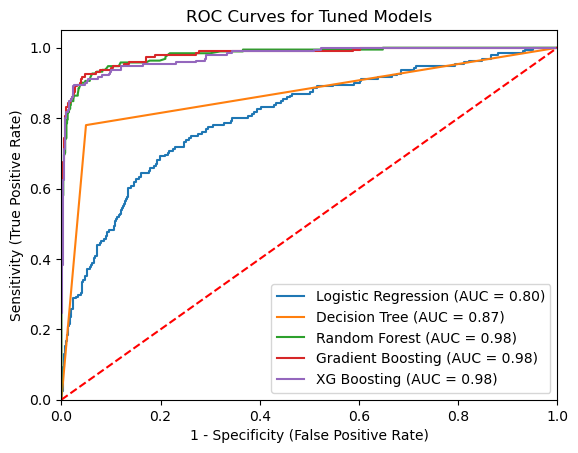

In [96]:
# Define models with tuned parameters
models = [ { 'label': 'Logistic Regression', 'model': LogisticRegression(solver= 'saga', penalty = 'l2' , C = 0.1) }, 
              { 'label': 'Decision Tree', 'model': DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 1, max_depth= None, criterion = 'gini') }, 
              { 'label': 'Random Forest', 'model': RandomForestClassifier(n_estimators = 200, min_samples_split = 2, max_features = 8, max_depth = 20) },
              { 'label': 'Gradient Boosting', 'model': GradientBoostingClassifier(subsample= 0.8, n_estimators= 300, min_samples_split= 10, min_samples_leaf = 4, max_depth= 7, learning_rate= 0.1) 
              },
         { 'label': 'XG Boosting', 'model': XGBClassifier(n_estimators= 300, max_depth= 8, learning_rate= 0.1, colsample_bytree= 0.8)
              }]

#when we have multiple models we need to create a dictionary

for algo in models:
    name = algo['label']
    model = algo['model']
    
    # Train model
    model.fit(X1_train, y1_train)
    
    # Predict probabilities
    y_pred_proba = model.predict_proba(X1_test)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y1_test, y_pred_proba)
    
    # Compute AUC
    auc_score = roc_auc_score(y1_test, y_pred_proba)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (name, auc_score))

# Plot baseline
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('ROC Curves for Tuned Models')
plt.legend(loc="lower right")
plt.show()


how to read the graph?
AUC = Area Under the ROC Curve  
It measures how well a model can distinguish between classes (positive vs negative).

Interpretation of values:

0.5 → Model is no better than random guessing (diagonal line baseline).

0.6–0.7 → Poor discrimination.

0.7–0.8 → Acceptable / fair.

0.8–0.9 → Good.

0.9–1.0 → Excellent, near-perfect separation.

How to Read the ROC Curve Graph ?

X-axis (False Positive Rate) → proportion of negatives incorrectly classified as positives.

Y-axis (True Positive Rate) → proportion of positives correctly classified.

Diagonal line (red dashed) → baseline (random classifier).

Curve above the diagonal → better than random.

Closer to the top-left corner → better performance (high sensitivity, low false positives).

Comparing models:

The model with the curve closest to the top-left and highest AUC score is the best at distinguishing classes.

If two curves overlap, their performance is similar.

### Lets try adding new data and see how likely they are to buy the product

In [98]:


# Example new customer data (fill values as needed)
new_data = pd.DataFrame({
    'Age': [35],
    'TypeofContact': ['Self Enquiry'],
    'CityTier': [2],
    'DurationOfPitch': [20],
    'Occupation': ['Salaried'],
    'Gender': ['Male'],
    'NumberOfFollowups': [3],
    'ProductPitched': ['Deluxe'],
    'PreferredPropertyStar': [4],
    'MaritalStatus': ['Married'],
    'NumberOfTrips': [2],
    'Passport': [1],
    'PitchSatisfactionScore': [4],
    'OwnCar': [1],
    'Designation': ['Executive'],
    'MonthlyIncome': [50000],
    'TotalVisiting': [3]
})


In [99]:
new_data

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,35,Self Enquiry,2,20,Salaried,Male,3,Deluxe,4,Married,2,1,4,1,Executive,50000,3


In [1]:
from sklearn.metrics import accuracy_score

# Transform new data using the same preprocessor
new_data_transformed = preprocessor.transform(new_data)

for algo in models: 
    name = algo['label']
    model = algo['model']
    
    # Train model on training set
    model.fit(X1_train, y1_train)
    
    # Predict class (0 = not taken, 1 = taken)
    prediction = model.predict(new_data_transformed)[0]
    
    # Predict probability
    probability = model.predict_proba(new_data_transformed)[0][1]  # probability of class 1
    
    # Print results
    print(f"{name}:")
    print(f"  Prediction → {'Package Taken' if prediction == 1 else 'Not Taken'}")
    print(f"  Probability of Taking Package → {probability:.2f}")
    print("="*40)


NameError: name 'preprocessor' is not defined